In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
df_raw = pd.read_csv("C:/Users/소은/Desktop/Academy/빅데이터/Big Data 분석/HMEQ.csv")

In [3]:
df_raw.isnull().sum()
df_raw["JOB"].fillna("Other",inplace = True)
df_raw.fillna(df_raw.mean(),inplace=True)

In [4]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_x = df_raw_dummy.drop("BAD",axis = 1, inplace = False)
df_raw_y = df_raw_dummy["BAD"]
df_train_x, df_test_x, df_train_y,df_test_y  = train_test_split(df_raw_x,df_raw_y,test_size = 0.3, random_state = 1234)

In [5]:
gb_uncustomized=GradientBoostingClassifier(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))

Score on training set:0.963
Score on test set:0.941


In [6]:
gb_uncustomized

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [7]:
train_accuracy = []; test_accuracy = []
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb=GradientBoostingClassifier(learning_rate = v_learning_rate,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["TrainAccuracy"] = train_accuracy
df_accuracy_lr["TestAccuracy"] = test_accuracy

In [8]:
df_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy
0,0.1,0.963,0.941
1,0.2,0.984,0.940
2,0.3,0.994,0.939
3,0.4,0.999,0.944
4,0.5,1.000,0.934
5,0.6,1.000,0.937
6,0.7,1.000,0.941
7,0.8,0.999,0.931
8,0.9,1.000,0.937


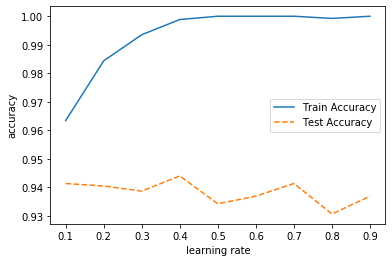

In [9]:
plt.plot(para_lr,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_lr,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("learning rate")
plt.legend()

In [10]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingClassifier(n_estimators = v_n_estimators,learning_rate  = 0.1,random_state = 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["Estimator"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

In [11]:
df_accuracy_n.round(3)

,Estimator,TrainAccuracy,TestAccuracy
0,10,0.933,0.928
1,20,0.939,0.932
2,30,0.947,0.936
3,40,0.952,0.940
4,50,0.956,0.940
5,60,0.957,0.940
6,70,0.957,0.939
7,80,0.960,0.939
8,90,0.961,0.940
9,100,0.963,0.941


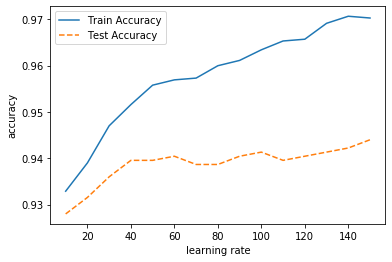

In [12]:
plt.plot(para_n_tree,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_n_tree,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("learning rate")
plt.legend()

In [13]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingClassifier(max_depth = v_max_depth,n_estimators = 100, learning_rate = 0.1,random_state= 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy

In [14]:
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.936,0.935
1,2,0.951,0.940
2,3,0.963,0.941
3,4,0.979,0.945
4,5,0.990,0.941
5,6,0.998,0.949
6,7,1.000,0.946
7,8,1.000,0.948
8,9,1.000,0.949
9,10,1.000,0.946


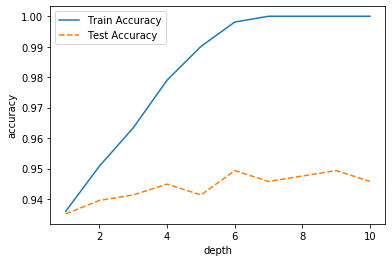

In [15]:
plt.plot(para_depth,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_depth,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("depth")
plt.legend()

In [16]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(2,11)]

for v_min_samples_split in para_split:
    gb=GradientBoostingClassifier(min_samples_split = v_min_samples_split,max_depth = 4,n_estimators = 100, learning_rate = 0.1,random_state= 1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [17]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,20,0.976,0.942
1,30,0.974,0.942
2,40,0.973,0.937
3,50,0.969,0.941
4,60,0.973,0.941
5,70,0.969,0.943
6,80,0.968,0.943
7,90,0.966,0.941
8,100,0.963,0.940


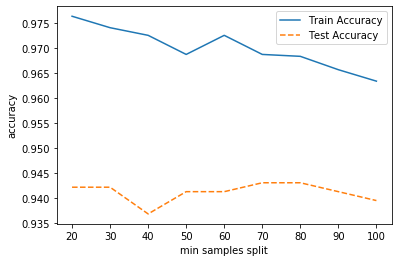

In [18]:
plt.plot(para_split,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_split,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("min samples split")
plt.legend()

In [19]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, max_depth =4, n_estimators = 100, learning_rate= 0.1,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [20]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.977,0.946
1,20,0.970,0.942
2,30,0.970,0.942
3,40,0.963,0.940
4,50,0.960,0.942
5,60,0.958,0.939
6,70,0.958,0.937
7,80,0.955,0.940
8,90,0.950,0.936
9,100,0.948,0.938


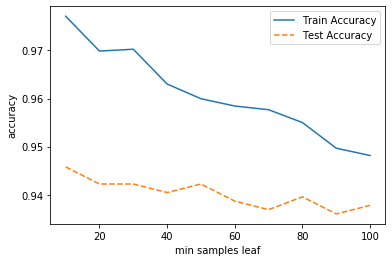

In [21]:
plt.plot(para_leaf,train_accuracy,linestyle="-",label = "Train Accuracy")
plt.plot(para_leaf,test_accuracy,linestyle="--",label = "Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("min samples leaf")
plt.legend()

In [22]:
gb_final=GradientBoostingClassifier(min_samples_leaf = 10, max_depth =4, n_estimators = 100, learning_rate= .1,random_state=1234)
gb_final.fit(df_train_x,df_train_y)
y_pred = gb_final.predict(df_test_x)
print("Accuracy on training set:{:3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.977125
Accuracy on test set:0.977125
Confusion matrix:
[[1018    3]
 [  58   46]]
              precision    recall  f1-score   support

           0      0.946     0.997     0.971      1021
           1      0.939     0.442     0.601       104

    accuracy                          0.946      1125
   macro avg      0.942     0.720     0.786      1125
weighted avg      0.945     0.946     0.937      1125



In [23]:
v_feature_name = df_train_x.columns
df_importance= pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] =gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.327
6,CLAGE,0.120
2,VALUE,0.107
8,CLNO,0.105
5,DELINQ,0.100
0,LOAN,0.072
1,MORTDUE,0.041
7,NINQ,0.038
4,DEROG,0.034
3,YOJ,0.033


Text(0, 0.5, '변수')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48320 missing from c

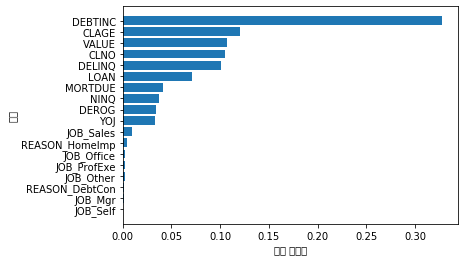

In [24]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates,width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [25]:
# GridsearchCV
# estimator = GradientBoostingClassifier(n_estimators = 100,random_state=1234)
# param_grid={"learning_rate":para_lr,"max_depth":para_depth,"min_samples_leaf":para_leaf}
# grid_gb = GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
# grid_gb.fit(df_train_x,df_train_y)
# print("best estimator model:\n".format(grid_gb.best_estimator))
# print("nbest parameter:\n".format(grid_gb.best_params_))
# print("nbest score:\n".format(grid_gb_best_score_round(3)))